In [32]:
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   #graph plotting library
import sys
import pickle   #serializing and de-serializing python objects
import os       #creating and removing a directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Input datasets

In [33]:
movies = pd.read_csv('movies.csv')
credits = pd.read_csv('credits.csv') 

In [34]:
movies.shape

(4803, 20)

In [35]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [36]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


New Dataset named final by merging movies and credits datasets

In [37]:
final = pd.merge(movies,credits,on='title')

In [38]:
final = final[['movie_id','title','overview','genres','keywords','cast','crew']]

In [39]:
final.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

Deleting null values

In [40]:
final.dropna(inplace=True)

In [41]:
final.duplicated().sum()

0

Importing abstract syntax tree to process trees of the Python abstract syntax grammar

In [42]:
import ast

In [43]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [44]:
final['genres'] = final['genres'].apply(convert)

In [45]:
final['keywords'] = final['keywords'].apply(convert)

In [46]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')


[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

Function to take only first three main cast of a movie

In [47]:
def convertcast(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 


In [48]:
final['cast'] = final['cast'].apply(convertcast)

Extracting director's name from crew column

In [49]:
def fetch(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [50]:
final['crew'] = final['crew'].apply(fetch)

In [51]:
final['overview'] = final['overview'].apply(lambda x:x.split())

This code removes space.

In [52]:
def space(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [53]:
final['cast'] = final['cast'].apply(space)
final['crew'] = final['crew'].apply(space)
final['genres'] = final['genres'].apply(space)
final['keywords'] = final['keywords'].apply(space)

connect all into single column as tags

In [54]:
final['tags'] = final['overview'] + final['genres'] + final['keywords'] + final['cast'] + final['crew']

New dataset by droping unused columns from final dataset

In [55]:
new_db = final.drop(columns=['overview','genres','keywords','cast','crew'])

converting list into string

In [56]:
new_db['tags'] = new_db['tags'].apply(lambda x: " ".join(x))
new_db.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [57]:
new_db['tags']=new_db['tags'].apply(lambda x:x.lower())

Convert a collection of text documents to a matrix of token counts and removing stopwords.

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

Converting cv object into a numpy array

In [60]:
vector = cv.fit_transform(new_db['tags']).toarray()

In [62]:
import nltk  #NLP Library

In [63]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()    #producing morphological variants of a root/base word

In [64]:
def stem(text):
   y=[]
   for i in text.split(): 
     y.append(ps.stem(i))
   return " ".join(y)

In [65]:
new_db['tags']=new_db['tags'].apply(stem)

In [66]:
new_db.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


measure the similarity between vector lists by calculating the cosine angle between the two vector lists by calculating the distance between them

In [67]:
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
similarity = cosine_similarity(vector)

In [69]:
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

Function to recommend a movie based on similarity

In [70]:
def recommend(movie):
    index = new_db[new_db['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_db.iloc[i[0]].title)
        

In [71]:
recommend('Batman Begins')

The Dark Knight
The Dark Knight Rises
Batman
Batman & Robin
Batman


Dumping a code into file inorder to render info through it

In [72]:
pickle.dump(new_db,open('movies.pkl','wb'))

In [73]:
pickle.dump(new_db.to_dict(),open('movie_dict.pkl','wb'))

In [74]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [75]:
final['genres'].head()

0    [Action, Adventure, Fantasy, ScienceFiction]
1                    [Adventure, Fantasy, Action]
2                      [Action, Adventure, Crime]
3                [Action, Crime, Drama, Thriller]
4             [Action, Adventure, ScienceFiction]
Name: genres, dtype: object

In [76]:
movies['genres'].head()

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

Genre dataset for recommending movies based on a particular genre

In [77]:
genre_db = pd.DataFrame({'movie_id':credits['movie_id'],'name':new_db['title'],'genres':final['genres'],'votes':movies['vote_average']})

In [78]:
genre_db.head()

,movie_id,name,genres,votes
0,19995.0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2
1,285.0,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",6.9
2,206647.0,Spectre,"[Action, Adventure, Crime]",6.3
3,49026.0,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6
4,49529.0,John Carter,"[Action, Adventure, ScienceFiction]",6.1


In [79]:
pickle.dump(genre_db,open('genres.pkl','wb'))

In [80]:
counts = dict()
for i in movies.index:
   for g in movies.loc[i,'genres'].split(' '):
      if g not in counts:
         counts[g] = 1
      else:
         counts[g] = counts[g] + 1

In [81]:
for i in range(genre_db['genres'].count()):
     print(genre_db['genres'][i])

['Action', 'Adventure', 'Fantasy', 'ScienceFiction']
['Adventure', 'Fantasy', 'Action']
['Action', 'Adventure', 'Crime']
['Action', 'Crime', 'Drama', 'Thriller']
['Action', 'Adventure', 'ScienceFiction']
['Fantasy', 'Action', 'Adventure']
['Animation', 'Family']
['Action', 'Adventure', 'ScienceFiction']
['Adventure', 'Fantasy', 'Family']
['Action', 'Adventure', 'Fantasy']
['Adventure', 'Fantasy', 'Action', 'ScienceFiction']
['Adventure', 'Action', 'Thriller', 'Crime']
['Adventure', 'Fantasy', 'Action']
['Action', 'Adventure', 'Western']
['Action', 'Adventure', 'Fantasy', 'ScienceFiction']
['Adventure', 'Family', 'Fantasy']
['ScienceFiction', 'Action', 'Adventure']
['Adventure', 'Action', 'Fantasy']
['Action', 'Comedy', 'ScienceFiction']
['Action', 'Adventure', 'Fantasy']
['Action', 'Adventure', 'Fantasy']
['Action', 'Adventure']
['Adventure', 'Fantasy']
['Adventure', 'Fantasy']
['Adventure', 'Drama', 'Action']
['Drama', 'Romance', 'Thriller']
['Adventure', 'Action', 'ScienceFiction']
[

In [82]:
genre_db.dropna(inplace=True)

In [83]:
genre_db.head()

,movie_id,name,genres,votes
0,19995.0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2
1,285.0,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",6.9
2,206647.0,Spectre,"[Action, Adventure, Crime]",6.3
3,49026.0,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6
4,49529.0,John Carter,"[Action, Adventure, ScienceFiction]",6.1


<AxesSubplot:>

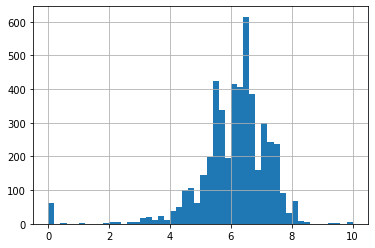

In [84]:
genre_db['votes'].hist(bins=50)

Funtion to recommend movies based on genres

In [85]:
def recommend_genre(gen):
    genre_dict = {}
    N = 10
    for i in range(genre_db['genres'].count()):
        if i in genre_db.index :
            if gen in genre_db['genres'][i]:
                genre_dict[genre_db['name'][i]] = genre_db['votes'][i]
    topN = sorted(genre_dict.items(),key = lambda x: x[1],reverse=True)
    for i in range(N):
        if i < len(topN):    
            print(topN[i][0])
        else :
            break


In [86]:
type(genre_db['genres'][0])

list

In [87]:
recommend_genre('Fantasy')

The Green Mile
The Thief and the Cobbler
The Lord of the Rings: The Return of the King
The Lord of the Rings: The Fellowship of the Ring
The Lord of the Rings: The Two Towers
Bogus
Sliding Doors
Special
Nanny McPhee
Beetlejuice


In [88]:
pickle.dump(genre_db,open('genres.pkl','wb'))

In [89]:
def recommend_genre(gen):
    genre_dict = {}
    N = 5
    recommended_genre = []
    recommended_genre_posters = []

    for i in range(genre_db['genres'].count()):
        if i in genre_db.index :
            if gen in genre_db['genres'][i]:
                genre_dict[i] = genre_db['votes'][i]
    topN = sorted(genre_dict.items(), key = lambda x: x[1], reverse=True)
    for i in range(N):
        if i < len(topN):
            genre_id = genre_db.iloc[topN[i][0]].movie_id
            recommended_genre.append(genre_db['name'][topN[i][0]])
            recommended_genre_posters.append(genre_id)
        else:
            break
    return recommended_genre,recommended_genre_posters



In [90]:
recommend_genre('Fantasy')

(['The Green Mile',
  'The Thief and the Cobbler',
  'The Lord of the Rings: The Return of the King',
  'The Lord of the Rings: The Fellowship of the Ring',
  'The Lord of the Rings: The Two Towers'],
 [497.0, 1891.0, 122.0, 120.0, 121.0])